<center><h1>Analysis of Air Quality during The Covid19 Pandemic</h1></center>

<center><h4>An analysis by Namrita Perincherry, Brian Tran and Kevin Nogales</h4></center><br>
<center><h4>Published July 20, 2020</h4></center>

# Introduction 
On December 31st 2019, Wuhan Municipal Health Commision, China, reported a cluster of pneumonia cases in Wuhan Province. This led to the discovery of a novel coronavirus strain, which would eventually become known as COVID-19. January 13th 2020, a mere two weeks later, Thailand reports the first case of COVID-19 outside of China; the beginnings of a global pandemic. Fast forward only two months later to March 11th, COVID-19 is officially classified as a pandemic, a disease prevalent all over the world. To put this into perspective, the last highly deadly pandemic was in 1918, the novel H1N1 flu virus, or “Spanish Flu.” The rise of COVID-19 is the first time in a century where a virus threatened human life to this extent.

COVID-19 has an extensive list of symptoms, including but not limited to: fever, nausea, diarrhea, loss of taste and smell, but most notably difficulty breathing. COVID-19 causes pneumonia, a condition where the lungs are filled with fluid and inflamed, making it difficult to breath. As COVID-19 pneumonia worsens, it eventually leads to lung failure, and potentially death. Ironically, while COVID-19 makes it incredibly difficult for humans to breathe, the resulting global pandemic has allowed our planet Earth to breathe freely. 

With the threat of COVID-19, most countries began implementing extensive quarantine policies on its citizens, causing work and school to move online. With more people at home than ever before, and fewer people are in their cars and power plants, air pollution has reportedly dropped a significant amount around the globe. In the United States, quarantining is largely organized by individual states. This leads to some states, when controlling for population, having more cases of COVID-19 than other states. Using the data from a google service called BigQuery, we will investigate how the number of COVID-19 cases, and quarantine has affected the quality of air across different states in the United States.

# Required Tools:
You will need the following libraries:
<ul>
    <li>matplotlib</li>
    <li>pandas</li>
    <li>numpy</li>
    <li>bigquery</li>
    <li>requests</li>
    <li>ggplot</li>
</ul>

# Referenced Documentation:

<ul>
    <li><a href="https://cloud.google.com/bigquery/docs/quickstarts/quickstart-client-libraries">BigQuery Quickstart Tutorial</a></li>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html">Numpy Tutorial</a></li>
    <li><a href="https://numpy.org/devdocs/user/quickstart.html">Numpy Quickstart Tutorial</a></li>
</ul>

# Table of Contents:
<ul>
    <li><a href="#data_collection">1.  Data Collection</a></li>
    <li><a href="#data_processing">2.  Data Processing</a></li>
    <li><a href="#analysis">3.  Exploratory Analysis & Data Visualization</a></li>
    <li><a href="#linear">4.1 Linear Regression and Hypothesis Test</a></li>
    <li><a href="#ml">4.2 ML</a></li>
    <li><a href="#insight_policy">5.  Insight and Policy Decisions</a></li>
</ul>

# 1. <b id="data_collection">Data Collection:</b>
### Covid-19 Data Collection:

In the Data Collection stage of the Data Lifecycle, we will focus on fetching data from a Google service called BigQuery. BigQuery provides public datasets for any Google Cloud user. Once the desired data is retrieved, we will insert that data into a dataframe for later use.

The first set of data needed is the data on the number of confirmed Covid19 cases in the United States. 

In [65]:
client = bigquery.Client()
date_range = ''
date_range += '_4_30_20, '
for i in range(1, 31):
    date_range += '_5_%d_20, ' % i
date_range += '_5_31_20'
QUERY = ('SELECT state, %s FROM `bigquery-public-data.covid19_usafacts.confirmed_cases` ' % date_range)
#query_job = client.query(QUERY)
#rows = query_job.result()
raw_cases = pd.read_gbq(QUERY, project_id="cmsc320finalproject",dialect='standard')
raw_cases

Downloading: 100%|██████████| 3195/3195 [00:01<00:00, 2465.21rows/s]


,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AL,886,929,946,969,992,1020,1048,1065,1094,...,1498,1576,1614,1630,1645,1673,1715,1744,1780,1826
1,AZ,3972,4156,4421,4585,4751,4929,5138,5196,5525,...,7950,8177,8277,8379,8448,8627,8896,9112,9522,9937
2,AR,168,160,178,174,163,163,145,153,154,...,144,148,150,159,174,181,193,193,196,188
3,CA,1603,1636,1705,1749,1776,1809,1863,1917,1961,...,2708,2767,2847,2874,2986,3049,3097,3195,3289,3390
4,CA,891,907,934,945,947,969,985,999,1014,...,1259,1296,1321,1336,1353,1375,1384,1404,1426,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WA,45,47,53,53,59,60,62,62,64,...,71,72,72,73,73,73,73,73,73,73
3191,VA,56,56,56,56,59,61,61,61,61,...,67,69,69,69,69,70,72,73,73,77
3192,VA,49,51,55,55,55,58,58,63,65,...,104,108,108,108,122,129,129,129,134,134
3193,GA,57,59,59,59,60,61,64,64,65,...,93,95,95,99,102,107,113,118,118,119


### Airnow Air Quality Data Collection:


Use Airnow API to collect Air Quality data for each state in the United States for May 2020.
Collect Data in batches since the AirNow API limits to 500 requests and range queries don't seem to work.

In order to use the Airnow API you will need to create an AirNow Developer account <a href="https://docs.airnowapi.org">here.</a> Then navigate to the AirNow API - Web Services page and copy your API key to use with the functions specified below:

In [29]:
# Sample of ZIP codes for each state since the AirNow API needs a zip code to retrieve data. 
sample_zip_codes = {
    'AL' : '36104', 
    'AK' : '99801', 
    'AZ' : '85001',
    'AR' : '72201',
    'CA' : '95814',
    'CO' : '80202',
    'CT' : '06103',
    'DE' : '19901',
    'FL' : '32301',
    'GA' : '30303',
    'HI' : '96813',
    'ID' : '83702',
    'IL' : '62701',
    'IN' : '46225',
    'IA' : '50309',
    'KS' : '66603',
    'KY' : '40601',
    'LA' : '70802',
    'ME' : '04330',
    'MD' : '21401',
    'MA' : '02201',
    'MI' : '48933',
    'MN' : '55102',
    'MS' : '39205',
    'MO' : '65101',
    'MT' : '59623',
    'NE' : '68502',
    'NV' : '89701',
    'NH' : '03301',
    'NJ' : '08608',
    'NM' : '87501',
    'NY' : '12207',
    'NC' : '27601',
    'ND' : '58501',
    'OH' : '43215',
    'OK' : '73102',
    'OR' : '97301',
    'PA' : '17101',
    'RI' : '02903',
    'SC' : '29217',
    'SD' : '57501',
    'TN' : '37219',
    'TX' : '78701',
    'UT' : '84111',
    'VT' : '05602',
    'VA' : '23219',
    'WA' : '98507',
    'WV' : '25301',
    'WI' : '53703',
    'WY' : '82001',
    'DC' : '20001'
}

# Individual API calls with zip code, date and distance values. 
def hist_airnow_api_call(zip_code, date, distance):
    built_call = 'http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=%s&date=%sT00-0000&distance=50&API_KEY=%s' % (zip_code, date, api_key)
    result = requests.get(built_call)    
    if result.status_code == 200:
        return pd.DataFrame(result.json())
    else:
        return pd.DataFrame()

# Batch API calls.
def get_may_data(start_index):
    # Function can be edited to change starting index for API calls, since the AirNow API only allows
    # 500 API calls per hour.
    return_df = pd.DataFrame()
    date = '2020-05-%s'
    counter = 0
    
    for zip_code in sample_zip_codes.values():
        for day_date in range(1,32):
            if counter >= start_index
                gen_date = date % str(day_date).rjust(2, '0')
                gen_df = hist_airnow_api_call(zip_code, gen_date, '50')
                return_df = return_df.append(gen_df, ignore_index=True)
            counter += 1
            
    return return_df

# raw_data1 = get_may_data()
# raw_data2 = get_may_data()
# raw_data3 = get_may_data()
# raw_data4 = get_may_data()

# Write data to local CSV files for easier processing:

# raw_data1.to_csv('raw_data_1.csv', encoding='utf-8', index=False)
# raw_data2.to_csv('raw_data_2.csv', encoding='utf-8', index=False)
# raw_data3.to_csv('raw_data_3.csv', encoding='utf-8', index=False)
# raw_data4.to_csv('raw_data_4.csv', encoding='utf-8', index=False)

# Read data from stored csv files.
df1 = pd.read_csv("raw_data_1.csv")
df2 = pd.read_csv("raw_data_2.csv")
df3 = pd.read_csv("raw_data_3.csv")
df4 = pd.read_csv("raw_data_34.csv")

# Merge data.
merged_air_now_may = df1.append(df2, ignore_index=True)
merged_air_now_may = merged_air_now_may.append(df2, ignore_index=True)
merged_air_now_may = merged_air_now_may.append(df3, ignore_index=True)
merged_air_now_may = merged_air_now_may.append()
merged_air_now_may

,DateObserved,HourObserved,LocalTimeZone,ReportingArea,StateCode,Latitude,Longitude,ParameterName,AQI,Category
0,2020-05-01,0,AKT,Juneau,AK,58.3000,-134.4167,PM2.5,33,"{'Number': 1, 'Name': 'Good'}"
1,2020-05-01,0,AKT,Juneau,AK,58.3000,-134.4167,PM10,9,"{'Number': 1, 'Name': 'Good'}"
2,2020-05-02,0,AKT,Juneau,AK,58.3000,-134.4167,PM2.5,45,"{'Number': 1, 'Name': 'Good'}"
3,2020-05-02,0,AKT,Juneau,AK,58.3000,-134.4167,PM10,13,"{'Number': 1, 'Name': 'Good'}"
4,2020-05-03,0,AKT,Juneau,AK,58.3000,-134.4167,PM2.5,7,"{'Number': 1, 'Name': 'Good'}"
...,...,...,...,...,...,...,...,...,...,...
1960,2020-05-24,0,EST,Concord,NH,43.2069,-71.5342,OZONE,35,"{'Number': 1, 'Name': 'Good'}"
1961,2020-05-25,0,EST,Concord,NH,43.2069,-71.5342,OZONE,26,"{'Number': 1, 'Name': 'Good'}"
1962,2020-05-26,0,EST,Concord,NH,43.2069,-71.5342,OZONE,43,"{'Number': 1, 'Name': 'Good'}"
1963,2020-05-27,0,EST,Concord,NH,43.2069,-71.5342,OZONE,46,"{'Number': 1, 'Name': 'Good'}"


In [34]:
# PM2.5 Data
pm25_data = merged_air_now_may[merged_air_now_may['ParameterName'] == 'PM2.5']
pm25_data

,DateObserved,HourObserved,LocalTimeZone,ReportingArea,StateCode,Latitude,Longitude,ParameterName,AQI,Category
0,2020-05-01,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,33,"{'Number': 1, 'Name': 'Good'}"
2,2020-05-02,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,45,"{'Number': 1, 'Name': 'Good'}"
4,2020-05-03,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,7,"{'Number': 1, 'Name': 'Good'}"
6,2020-05-04,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,14,"{'Number': 1, 'Name': 'Good'}"
8,2020-05-05,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,19,"{'Number': 1, 'Name': 'Good'}"
...,...,...,...,...,...,...,...,...,...,...
4116,2020-05-27,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"
4119,2020-05-28,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"
4122,2020-05-29,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,36,"{'Number': 1, 'Name': 'Good'}"
4125,2020-05-30,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"


#### We will specifically analyze the AQI values for Particulate Matter (PM2.5), since that an air pollutant of great concern for the health of populations. Below are some simple visual previews of the distribution of PM2.5 across the United States for May 2020.

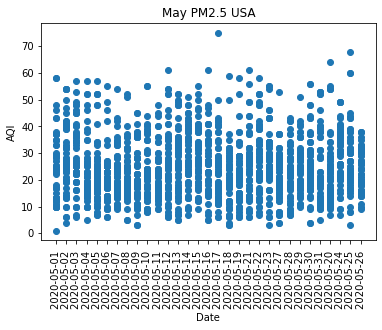

In [41]:
date = pm25_data['DateObserved']
pm25_aqi = pm25_data['AQI']

plt.plot(date, pm25_aqi, 'o')
plt.title('May PM2.5 USA')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('AQI')
plt.show()

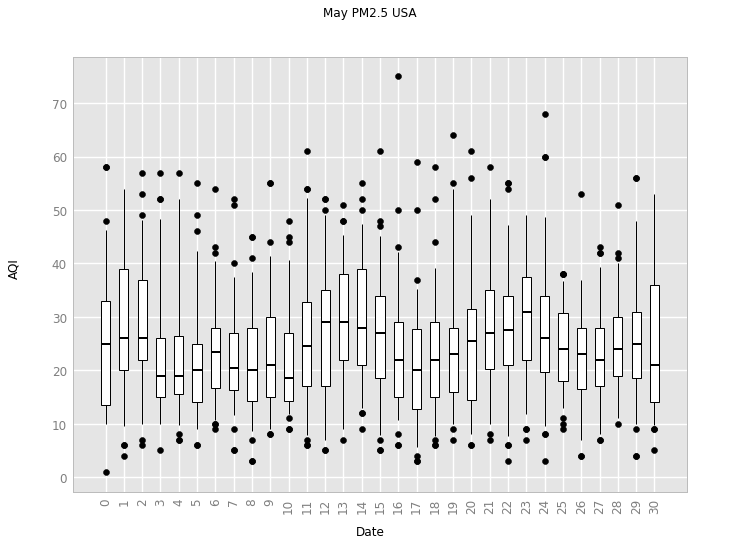

<ggplot: (8758873839877)>

In [54]:
ggplot(aes(x='DateObserved', y='AQI'), data=pm25_data) +\
    geom_boxplot() +\
    theme(axis_text_x = element_text(angle=90, hjust=1)) +\
    labs(title="May PM2.5 USA", x = "Date", y = "AQI")

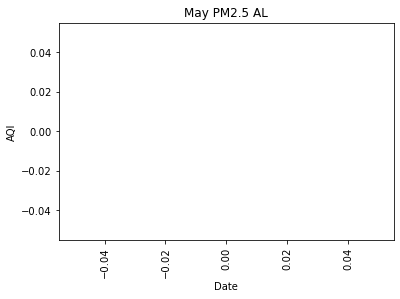

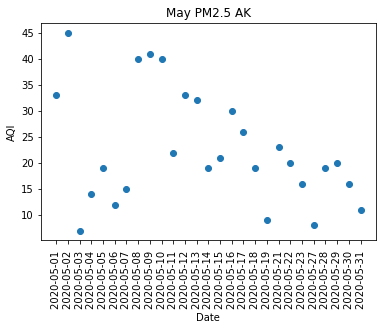

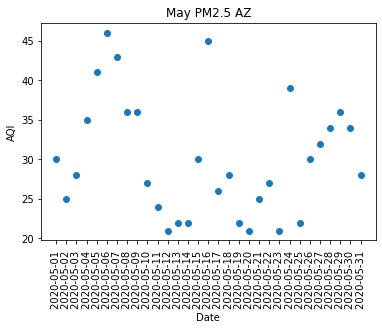

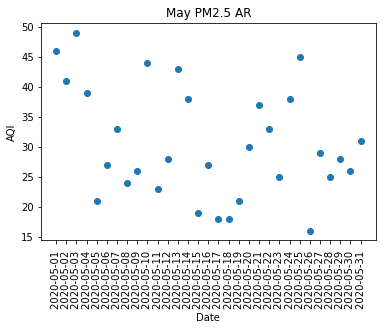

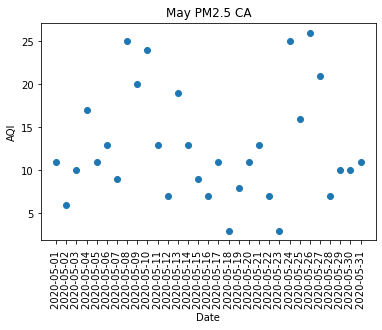

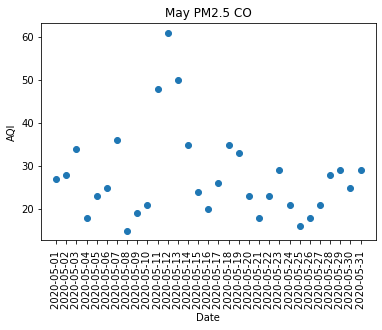

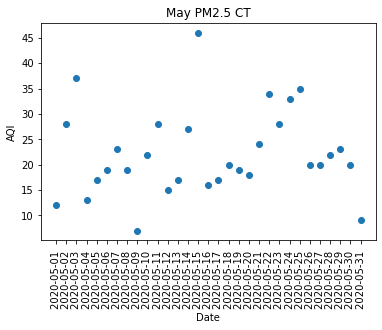

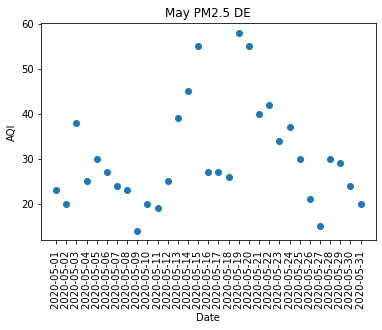

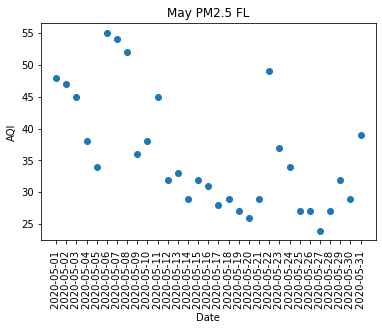

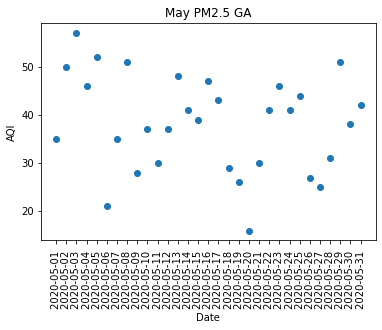

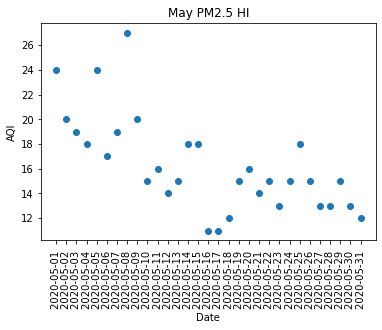

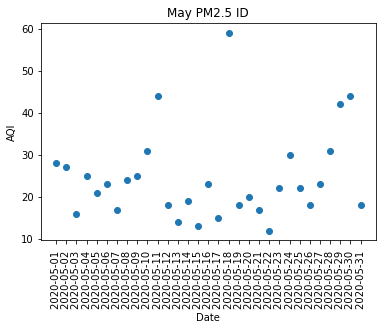

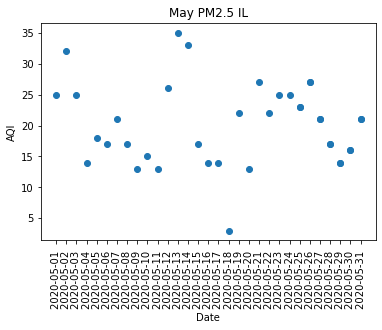

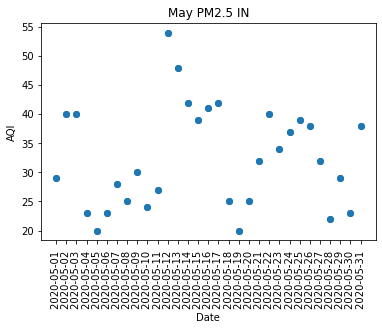

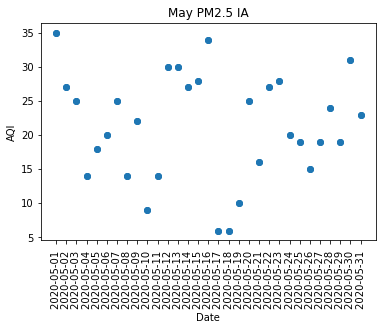

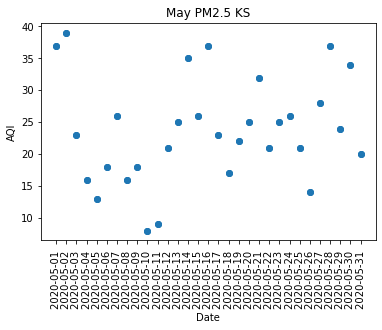

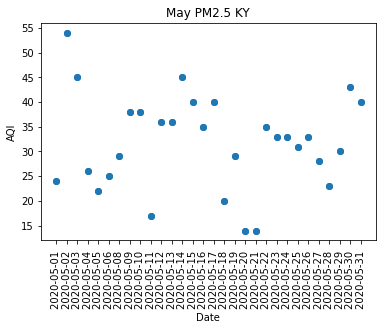

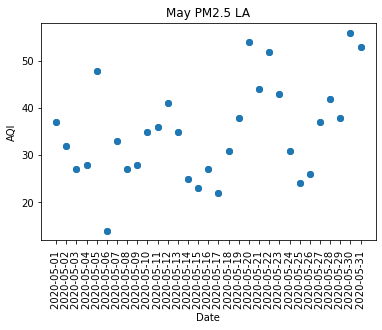

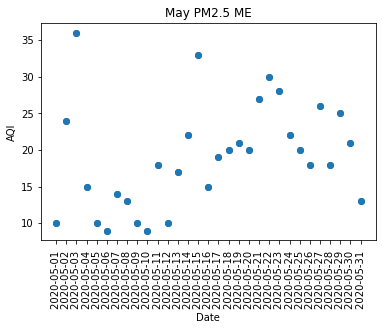

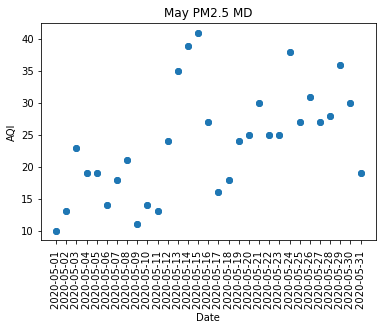

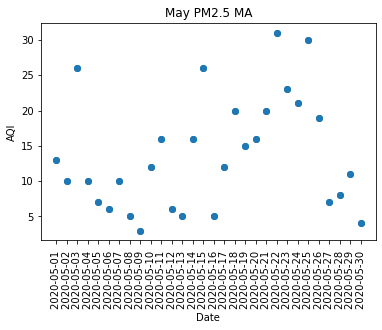

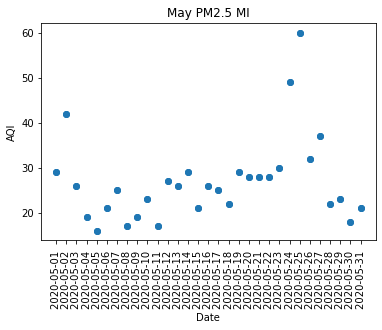

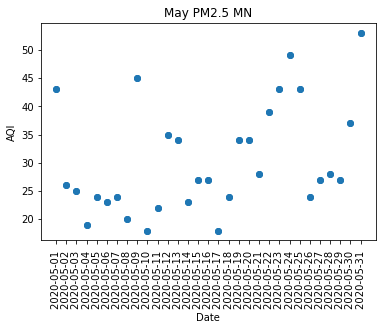

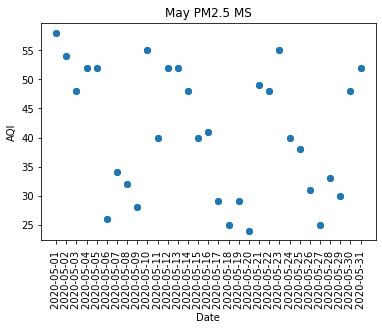

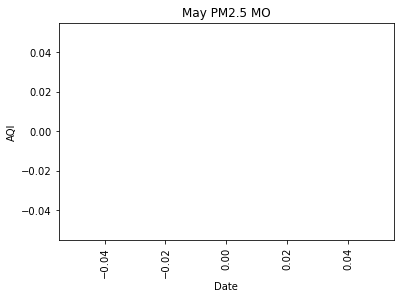

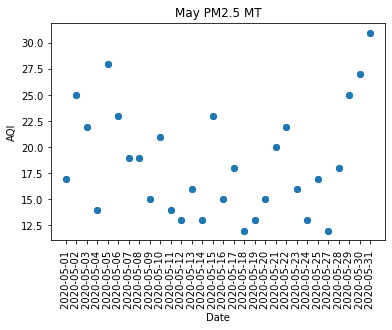

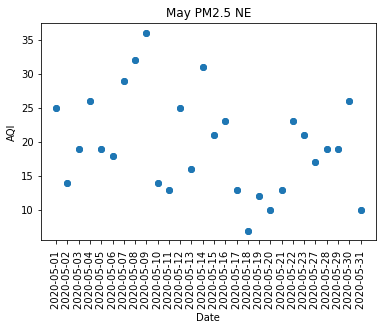

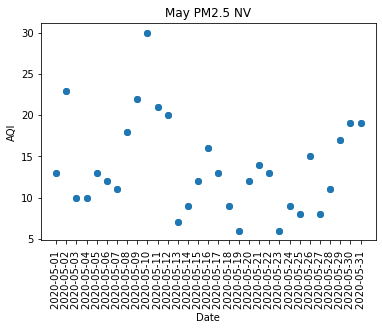

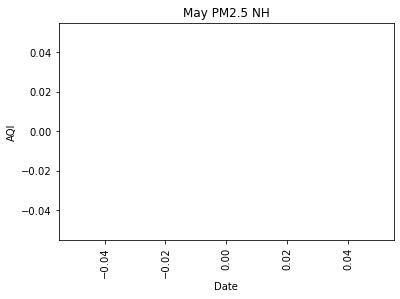

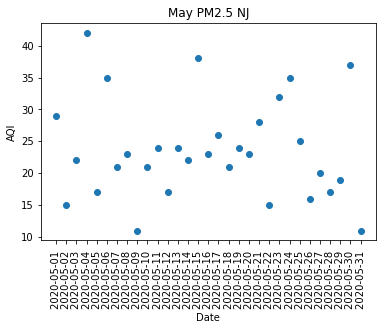

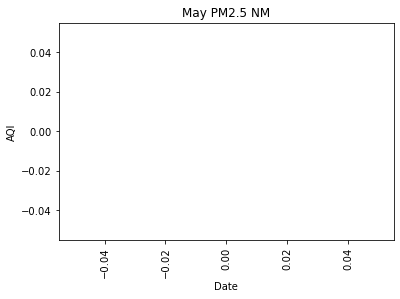

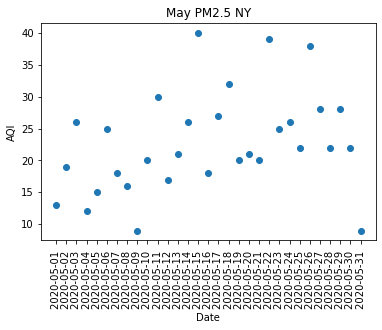

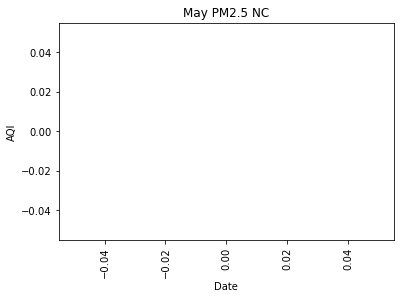

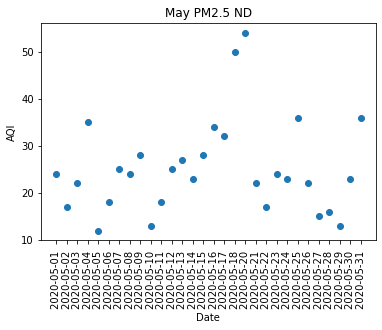

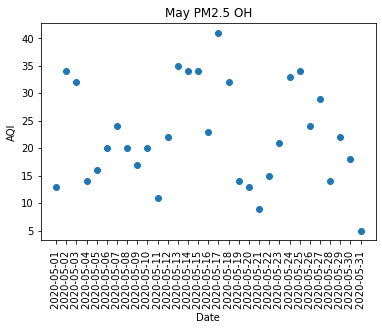

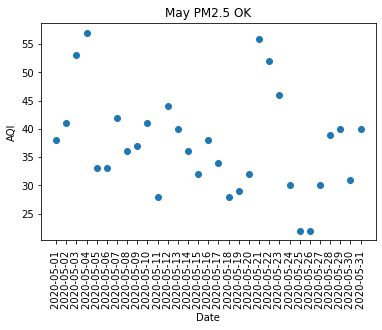

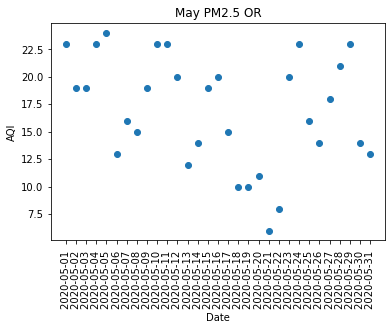

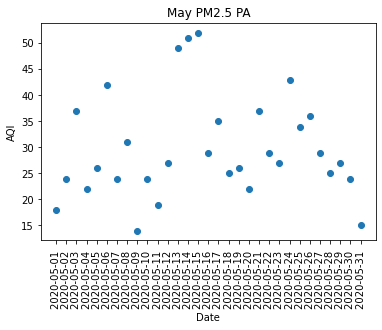

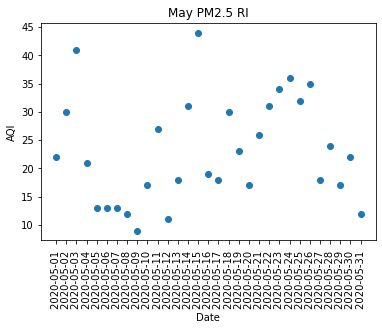

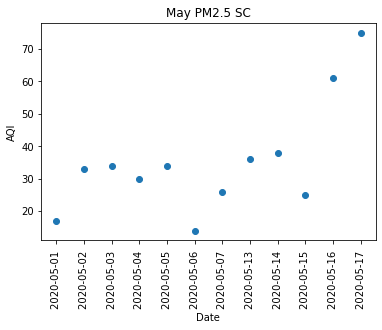

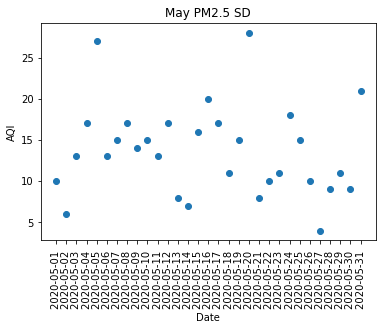

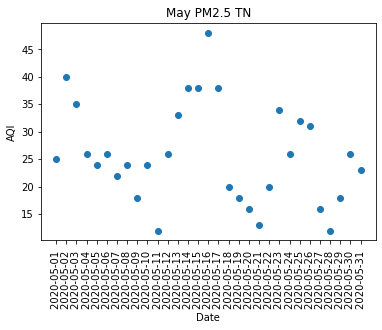

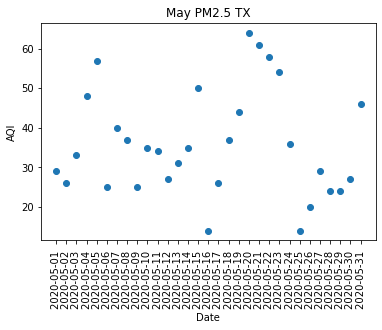

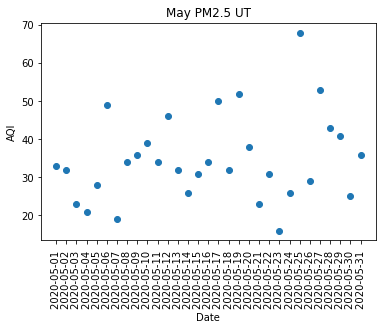

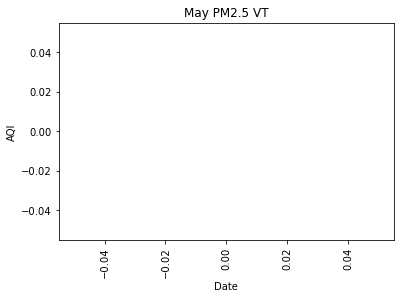

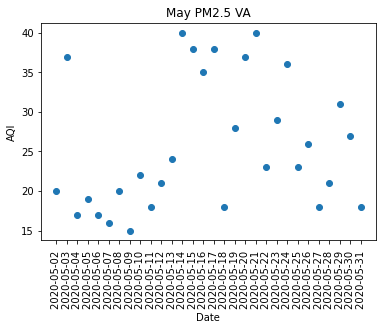

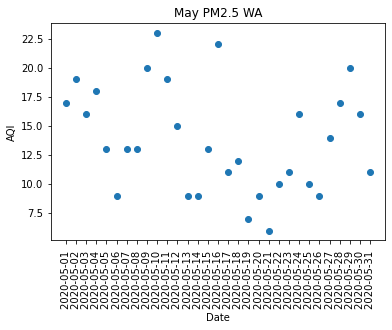

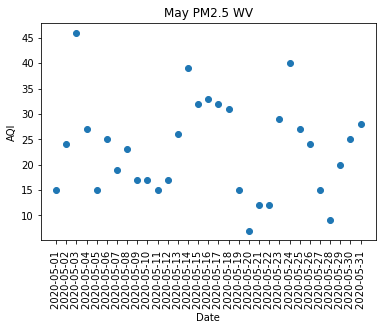

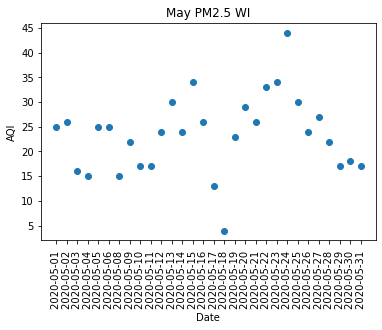

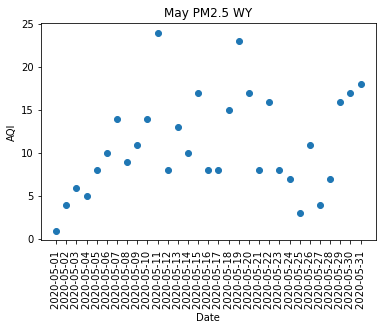

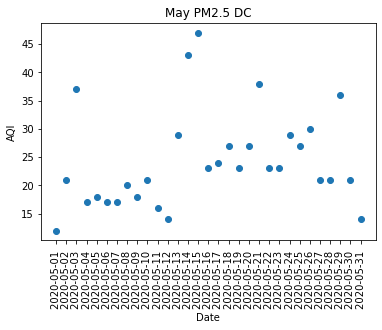

In [57]:
# Graphcs of PM2.5 AQI values for each state.
# As we can see, a few states do not have data. This is one of the major limitations for the current analysis. 
for state in sample_zip_codes.keys():
    curr_date = pm25_data['DateObserved'][pm25_data['StateCode'] == state]
    curr_pm25_aqi = pm25_data['AQI'][pm25_data['StateCode'] == state]

    plt.plot(curr_date, curr_pm25_aqi, 'o')
    plt.title('May PM2.5 %s' % state)
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('AQI')
    plt.show()

# 2. <b id="data_processing">Data Processing:</b>

In the Data Processing stage of the Data Lifecycle, we will organize and narrow down the data we want to use for
our analysis. In the BigQuery Covid19 Confirmed Cases dataset, the data goes all the way back to January 22, 2020
and is still collecting and publishing data. To simplify our analysis we will focus on data that was
collected from May 1, 2020 to May 31, 2020.
The first dataframe we will reference throughout the project is the raw data with only the date filtering. This means
that the data will be seperated by State and County.
The second dataframe will be filtered by date and grouped by States. Each state will have the sum of all the covid19
cases added for that particular date. 
The third dataframe will be filtered the same way as before, but now it will be the total covid19 cases for all
of the United States for each particular date in May.
The fourth and fifth dataframes will be the same as the second and third respectively, but instead of total number
of cases for each date, it will be new number of cases for each date. 



In [14]:
by_state = raw_cases.groupby(['state'], as_index=False).sum()
by_state

,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AK,356,365,366,369,371,372,373,375,378,...,404,408,408,409,411,412,425,430,434,460
1,AL,7063,7294,7611,7885,8110,8436,8691,9046,9384,...,13670,14152,14507,15194,15648,16029,16553,17031,17358,17849
2,AR,3269,3304,3358,3417,3461,3522,3607,3692,3745,...,5610,5772,5920,6028,6177,6277,6531,6776,7010,7252
3,AZ,7648,7961,8364,8640,8919,9304,9706,9944,10526,...,15607,16039,16339,16560,16782,17261,17763,18465,19255,20119
4,CA,50322,52253,53696,54947,56191,58752,60701,62373,64567,...,90778,92664,94449,96673,99851,101877,104014,106651,110136,112703
5,CO,15261,15766,16224,16624,16902,17364,17830,18371,18827,...,23485,23954,24157,24248,24542,24766,25121,25612,26098,26378
6,CT,27700,28764,29287,29287,29973,30621,30995,31783,32411,...,39640,40022,40465,40873,41234,41288,41559,41762,42022,42201
7,DC,4323,4658,4797,5016,5170,5322,5461,5654,5899,...,7893,7966,8110,8225,8334,8406,8492,8538,8717,8801
8,DE,4734,4918,5038,5208,5288,5371,5778,5939,6111,...,8529,8690,8809,8965,9066,9096,9171,9236,9422,9498
9,FL,33690,34725,35460,36078,36892,37429,38001,38828,39196,...,49447,50127,50866,51745,52254,52633,53285,54496,55421,56161


In [15]:
all_us = by_state.drop(['state'], axis=1)
all_us = pd.DataFrame({'date': all_us.sum().index, 'cases':all_us.sum().values})
all_us

,date,cases
0,_4_30_20,1063314
1,_5_1_20,1096406
2,_5_2_20,1126378
3,_5_3_20,1151544
4,_5_4_20,1173202
5,_5_5_20,1197324
6,_5_6_20,1220975
7,_5_7_20,1248587
8,_5_8_20,1275974
9,_5_9_20,1301552


### Below is a visual preview of the general trend for Covid19 cases across the United States for May 2020.

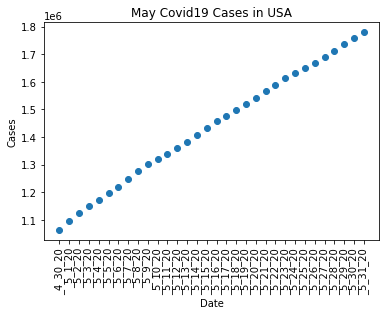

In [16]:
date = all_us['date']
cases = all_us['cases']

plt.plot(date, cases, 'o')
plt.title('May Covid19 Cases in USA')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Cases')
plt.show()

In [17]:
# Some more cleaning, in this section we are calculating the number of new cases for each state.
def new_cases_per_day_calc(row):
    prev_temp = row['_5_1_20']
    row['_5_1_20'] = prev_temp - row['_4_30_20']
    
    for i in range(2, 32):
        curr_date = '_5_%d_20' % i
        prev_date = '_5_%d_20' % (i - 1)
        curr_temp = row[curr_date]
        row[curr_date] = curr_temp - prev_temp
        prev_temp = curr_temp

    return row

cases_per_day = raw_cases.apply(lambda row: new_cases_per_day_calc(row), axis=1)
cases_per_day

,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AL,886,43,17,23,23,28,28,17,29,...,29,78,38,16,15,28,42,29,36,46
1,AZ,3972,184,265,164,166,178,209,58,329,...,115,227,100,102,69,179,269,216,410,415
2,AR,168,-8,18,-4,-11,0,-18,8,1,...,-7,4,2,9,15,7,12,0,3,-8
3,CA,1603,33,69,44,27,33,54,54,44,...,99,59,80,27,112,63,48,98,94,101
4,CA,891,16,27,11,2,22,16,14,15,...,25,37,25,15,17,22,9,20,22,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WA,45,2,6,0,6,1,2,0,2,...,0,1,0,1,0,0,0,0,0,0
3191,VA,56,0,0,0,3,2,0,0,0,...,0,2,0,0,0,1,2,1,0,4
3192,VA,49,2,4,0,0,3,0,5,2,...,5,4,0,0,14,7,0,0,5,0
3193,GA,57,2,0,0,1,1,3,0,1,...,6,2,0,4,3,5,6,5,0,1


In [19]:
by_state_daily = cases_per_day.groupby(['state'], as_index=False).sum()
by_state_daily

,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AK,356,9,1,3,2,1,1,2,3,...,2,4,0,1,2,1,13,5,4,26
1,AL,7063,231,317,274,225,326,255,355,338,...,260,482,355,687,454,381,524,478,327,491
2,AR,3269,35,54,59,44,61,85,85,53,...,154,162,148,108,149,100,254,245,234,242
3,AZ,7648,313,403,276,279,385,402,238,582,...,292,432,300,221,222,479,502,702,790,864
4,CA,50322,1931,1443,1251,1244,2561,1949,1672,2194,...,2454,1886,1785,2224,3178,2026,2137,2637,3485,2567
5,CO,15261,505,458,400,278,462,466,541,456,...,307,469,203,91,294,224,355,491,486,280
6,CT,27700,1064,523,0,686,648,374,788,628,...,437,382,443,408,361,54,271,203,260,179
7,DC,4323,335,139,219,154,152,139,193,245,...,105,73,144,115,109,72,86,46,179,84
8,DE,4734,184,120,170,80,83,407,161,172,...,143,161,119,156,101,30,75,65,186,76
9,FL,33690,1035,735,618,814,537,572,827,368,...,776,680,739,879,509,379,652,1211,925,740


In [20]:
all_us_daily = by_state_daily.drop(['state'], axis=1)
all_us_daily = pd.DataFrame({'date': all_us_daily.sum().index, 'cases':all_us_daily.sum().values})
all_us_daily = all_us_daily.drop([0])
all_us_daily

,date,cases
1,_5_1_20,33092
2,_5_2_20,29972
3,_5_3_20,25166
4,_5_4_20,21658
5,_5_5_20,24122
6,_5_6_20,23651
7,_5_7_20,27612
8,_5_8_20,27387
9,_5_9_20,25578
10,_5_10_20,20125


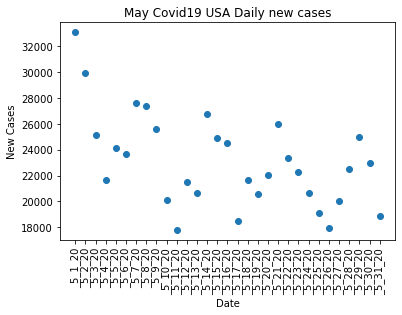

In [21]:
# Preview visual of new cases across the United States.
date = all_us_daily['date']
cases = all_us_daily['cases']

plt.plot(date, cases, 'o')
plt.title('May Covid19 USA Daily new cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('New Cases')
plt.show()

In [262]:
list_melt = ['state']
cases = []
for i in range(1,32):
    date = '_5_%d_20' % i
    list_melt.append(date)
    cases.append(date)
print(list_melt)
raw_cases_df = pd.melt(raw_cases, id_vars='state', value_vars=cases)
raw_cases_df = raw_cases_df.rename(columns={'variable':'date', 'value':'cases'})
raw_cases_df

['state', '_5_1_20', '_5_2_20', '_5_3_20', '_5_4_20', '_5_5_20', '_5_6_20', '_5_7_20', '_5_8_20', '_5_9_20', '_5_10_20', '_5_11_20', '_5_12_20', '_5_13_20', '_5_14_20', '_5_15_20', '_5_16_20', '_5_17_20', '_5_18_20', '_5_19_20', '_5_20_20', '_5_21_20', '_5_22_20', '_5_23_20', '_5_24_20', '_5_25_20', '_5_26_20', '_5_27_20', '_5_28_20', '_5_29_20', '_5_30_20', '_5_31_20']


,state,date,cases
0,AL,_5_1_20,929
1,AZ,_5_1_20,4156
2,AR,_5_1_20,160
3,CA,_5_1_20,1636
4,CA,_5_1_20,907
...,...,...,...
99040,WA,_5_31_20,73
99041,VA,_5_31_20,77
99042,VA,_5_31_20,134
99043,GA,_5_31_20,119


In [263]:
# Cleaning up dates for Covid19 dataset.
from datetime import datetime 
raw_cases_df['date'] = raw_cases_df['date'].apply(lambda x: datetime.strptime(x, '_%m_%d_%y'))
raw_cases_df = raw_cases_df.rename(columns={'value':'covid19_cases'})
raw_cases_df

,state,date,cases
0,AL,2020-05-01,929
1,AZ,2020-05-01,4156
2,AR,2020-05-01,160
3,CA,2020-05-01,1636
4,CA,2020-05-01,907
...,...,...,...
99040,WA,2020-05-31,73
99041,VA,2020-05-31,77
99042,VA,2020-05-31,134
99043,GA,2020-05-31,119


In [264]:
pm25_data['Category'].unique()

array(["{'Number': 1, 'Name': 'Good'}",
       "{'Number': 2, 'Name': 'Moderate'}"], dtype=object)

In [265]:
pm25_data = pm25_data.rename(columns={'DateObserved':'date', 'StateCode':'state'})
pm25_data

,date,HourObserved,LocalTimeZone,ReportingArea,state,Latitude,Longitude,ParameterName,AQI,Category
0,2020-05-01,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,33,"{'Number': 1, 'Name': 'Good'}"
2,2020-05-02,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,45,"{'Number': 1, 'Name': 'Good'}"
4,2020-05-03,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,7,"{'Number': 1, 'Name': 'Good'}"
6,2020-05-04,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,14,"{'Number': 1, 'Name': 'Good'}"
8,2020-05-05,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,19,"{'Number': 1, 'Name': 'Good'}"
...,...,...,...,...,...,...,...,...,...,...
4116,2020-05-27,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"
4119,2020-05-28,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"
4122,2020-05-29,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,36,"{'Number': 1, 'Name': 'Good'}"
4125,2020-05-30,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"


First I need to verify that data for each state on each day in May is recorded in each table. 

In [267]:
may_mask = raw_cases_df['date'].map(lambda x: x.month) == 5
# may_cases = pd.DataFrame()
# for i,row in raw_cases_df.iterrows():
#     if row['date'] >= pd.Timestamp('2020-05-01') and row['date'] <= pd.Timestamp('2020-05-31'):
        
print(raw_cases_df.dtypes)# 
raw_cases_df[may_mask]

state            object
date     datetime64[ns]
cases             int64
dtype: object


,state,date,cases
0,AL,2020-05-01,929
1,AZ,2020-05-01,4156
2,AR,2020-05-01,160
3,CA,2020-05-01,1636
4,CA,2020-05-01,907
...,...,...,...
99040,WA,2020-05-31,73
99041,VA,2020-05-31,77
99042,VA,2020-05-31,134
99043,GA,2020-05-31,119


In [268]:
print(raw_cases_df.groupby('state')['date'].count())

state
AK     961
AL    2108
AR    2356
AZ     496
CA    1860
CO    2015
CT     279
DC      31
DE     124
FL    2108
GA    4960
HI     186
IA    3100
ID    1395
IL    3193
IN    2883
KS    3286
KY    3751
LA    2015
MA     465
MD     775
ME     527
MI    2604
MN    2728
MO    3596
MS    2573
MT    1767
NC    3131
ND    1674
NE    2914
NH     341
NJ     682
NM    1054
NV     558
NY    1984
OH    2759
OK    2418
OR    1147
PA    2108
RI     186
SC    1457
SD    2077
TN    2976
TX    7905
UT     930
VA    4154
VT     465
WA    1240
WI    2263
WV    1736
WY     744
Name: date, dtype: int64


In [269]:
print(pm25_data.groupby('state')['date'].count())

state
AK    27
AR    31
AZ    31
CA    31
CO    31
CT    31
DC    31
DE    31
FL    31
GA    31
HI    31
IA    62
ID    31
IL    38
IN    62
KS    62
KY    60
LA    62
MA    60
MD    62
ME    62
MI    62
MN    62
MS    62
MT    60
ND    30
NE    56
NJ    31
NV    62
NY    31
OH    31
OK    31
OR    31
PA    31
RI    31
SC    12
SD    31
TN    31
TX    31
UT    31
VA    30
WA    31
WI    30
WV    31
WY    31
Name: date, dtype: int64


In [270]:
pm25_data.dtypes

date              object
HourObserved       int64
LocalTimeZone     object
ReportingArea     object
state             object
Latitude         float64
Longitude        float64
ParameterName     object
AQI                int64
Category          object
dtype: object

In [271]:
raw_cases_df.dtypes

state            object
date     datetime64[ns]
cases             int64
dtype: object

In [273]:
pm25_data['date'] = pm25_data['date'].apply(lambda x: datetime.strptime(x.strip(' \t\r\n'), '%Y-%m-%d'))
pm25_data.dtypes

date             datetime64[ns]
HourObserved              int64
LocalTimeZone            object
ReportingArea            object
state                    object
Latitude                float64
Longitude               float64
ParameterName            object
AQI                       int64
Category                 object
dtype: object

In [274]:
pm25_data

,date,HourObserved,LocalTimeZone,ReportingArea,state,Latitude,Longitude,ParameterName,AQI,Category
0,2020-05-01,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,33,"{'Number': 1, 'Name': 'Good'}"
2,2020-05-02,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,45,"{'Number': 1, 'Name': 'Good'}"
4,2020-05-03,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,7,"{'Number': 1, 'Name': 'Good'}"
6,2020-05-04,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,14,"{'Number': 1, 'Name': 'Good'}"
8,2020-05-05,0,AKT,Juneau,AK,58.300,-134.4167,PM2.5,19,"{'Number': 1, 'Name': 'Good'}"
...,...,...,...,...,...,...,...,...,...,...
4116,2020-05-27,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"
4119,2020-05-28,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"
4122,2020-05-29,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,36,"{'Number': 1, 'Name': 'Good'}"
4125,2020-05-30,0,EST,Metropolitan Washington,DC,38.919,-77.0130,PM2.5,21,"{'Number': 1, 'Name': 'Good'}"


In [275]:
full_df = pd.merge(raw_cases_df, pm25_data, how='inner', on=['date','state'])
full_df = full_df.drop_duplicates()
full_df

,state,date,cases,HourObserved,LocalTimeZone,ReportingArea,Latitude,Longitude,ParameterName,AQI,Category
0,AZ,2020-05-01,4156,0,MST,Phoenix,33.543,-112.0710,PM2.5,30,"{'Number': 1, 'Name': 'Good'}"
1,AZ,2020-05-01,478,0,MST,Phoenix,33.543,-112.0710,PM2.5,30,"{'Number': 1, 'Name': 'Good'}"
2,AZ,2020-05-01,498,0,MST,Phoenix,33.543,-112.0710,PM2.5,30,"{'Number': 1, 'Name': 'Good'}"
3,AZ,2020-05-01,122,0,MST,Phoenix,33.543,-112.0710,PM2.5,30,"{'Number': 1, 'Name': 'Good'}"
4,AZ,2020-05-01,82,0,MST,Phoenix,33.543,-112.0710,PM2.5,30,"{'Number': 1, 'Name': 'Good'}"
...,...,...,...,...,...,...,...,...,...,...,...
116784,AK,2020-05-31,4,0,AKT,Juneau,58.300,-134.4167,PM2.5,11,"{'Number': 1, 'Name': 'Good'}"
116785,AK,2020-05-31,16,0,AKT,Juneau,58.300,-134.4167,PM2.5,11,"{'Number': 1, 'Name': 'Good'}"
116786,AK,2020-05-31,29,0,AKT,Juneau,58.300,-134.4167,PM2.5,11,"{'Number': 1, 'Name': 'Good'}"
116787,AK,2020-05-31,45,0,AKT,Juneau,58.300,-134.4167,PM2.5,11,"{'Number': 1, 'Name': 'Good'}"


# 3. <b id="analysis">Exploratory Analysis & Data Visualization:</b>
At this point, our data is ready to analyze. In this part, we will visualize the data we just cleaned and collected from the previos sections with some plots and map in order to portray and explain the trend of deaths in the United States. Also, statistical measurement for this data is included.

<strong>COVID-19 Cases By Day</strong><br>
First thing we would like to analyze is the total number of cases per day for the month of May. We would like to know how this number changed every day and explain the trend of these cases.

<strong>Extract the Cases Number Per Day</strong><br>
Our data currently has many cases that belong to a specific days in the month of May. The question to ask is: How can we count the number of cases over the course of a year in that period? Fortunately, pandas' groupby function will help us do the trick. Documentation about pandas' groupby can be found at <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html">here</a>. The code below will demonstrate how we count the number of cases per Month based on our data.

In [278]:
# Use groupby and count functions to sum how many COVID-19 cases in a day
cases_per_day = full_df.copy().groupby(full_df['date'])['cases'].sum().reset_index().rename(columns={'sum':'num_cases'})
cases_per_day

,date,cases
0,2020-05-01,1033434
1,2020-05-02,1081362
2,2020-05-03,1104754
3,2020-05-04,1126009
4,2020-05-05,1147125
5,2020-05-06,1169473
6,2020-05-07,1183523
7,2020-05-08,1214247
8,2020-05-09,1239719
9,2020-05-10,1257289


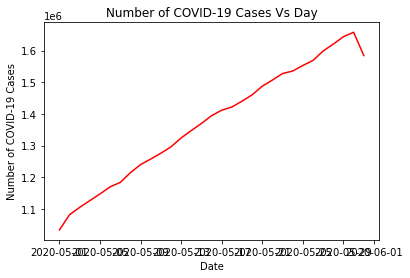

In [280]:
# Put data in plot, Year column is the x-axis, Count column is the y-axis
plt.plot(cases_per_day['date'], cases_per_day['cases'], color='red')
# Label y axis
plt.ylabel('Number of COVID-19 Cases')
# Label x axis
plt.xlabel('Date')
# Give the title of the plot
plt.title('Number of COVID-19 Cases Vs Day')
# Show it
plt.show()

The trend for the number of COVID-19 cases seems to increase by day. The number of cases reached maximum at the very end of May. After May, it seems like cases are decreasing. However, we are only looking at cases in May for this analysis. Thus, we can see a linearly increasing trend. 

<strong>COVID-19 Cases By State</strong><br>
It is interesting to know how many cases happened in each state in the US. Now, we want to introduce how COVID-19 is distributes in the US with some cool visualizations.

<strong>Extract the case number per state</strong><br>
We use the same strategy as above but with State column.

In [283]:
data_by_state = full_df.copy().groupby(full_df['state'])['cases'].sum().reset_index().rename(columns={'sum':'num_cases'})
data_by_state.head()

,state,cases
0,AK,10364
1,AR,140193
2,AZ,416847
3,CA,2469759
4,CO,657144


<strong>Visualize COVID-19 Cases Number With States With Graph</strong><br>
We have successfully plotted the line graph of cases with dates. Now, we do a similar task, but we will use a horizontal bar plot to show the number of cases with states.

Text(0.5, 1.0, 'State Vs Number of COVID-19 Cases')

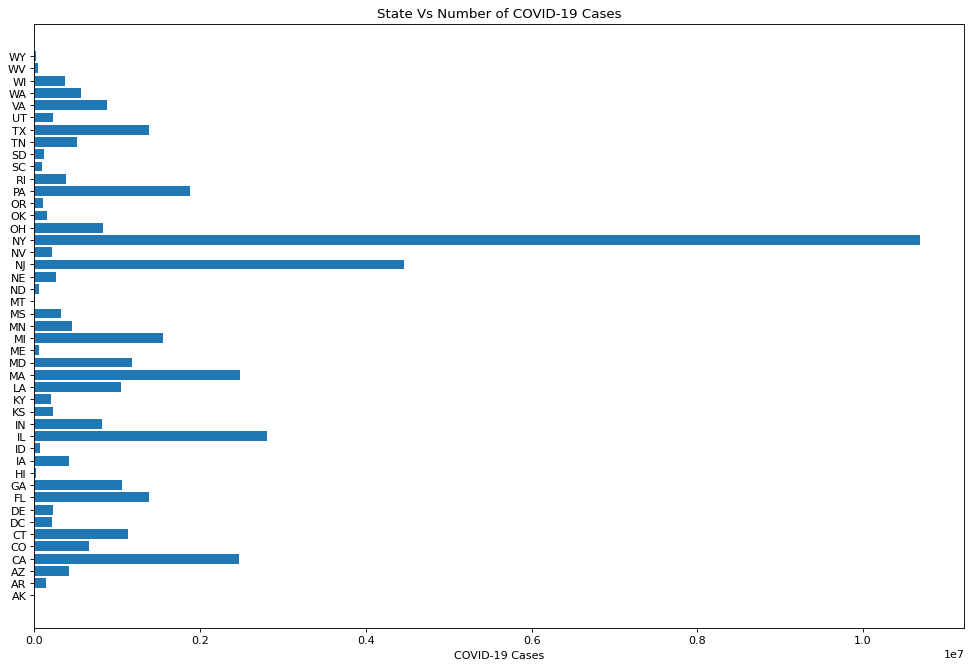

In [285]:
%matplotlib inline
# Initialize the size of the plot
plt.figure(figsize=(15, 10), dpi=80);
# Convert the State column to a numpy array
y_pos = np.arange(len(data_by_state['state']))
# Put the data into the plot
plt.barh(y_pos, data_by_state['cases'])
# Label y-axis
plt.yticks(y_pos, data_by_state['state'])
# Label x-axis
plt.xlabel('COVID-19 Cases')
# Create title of the plot
plt.title('State Vs Number of COVID-19 Cases')

In the graph, it shows that New York has the largest number of cases for the month of May. The runner-up is New Jersey, which is very close in proximity to New York. We can see the more metropolitan states like CA, IL, MA, TX are those with a high number of cases. 

<strong>Number of Cases By Air Quality Index</strong><br>
The last analysis we would like to do is the number of cases by air quality index. The analysis plays an important role of determining the air quality index of infected areas. This piece of information is useful for everyone to understand why air quality has an impact on the number of COVID-19 cases.

<strong>Extract the Number of COVID-19 Cases by Air Quality Index</strong><br>
We will use same strategy as above.

In [286]:
data_by_aqi = full_df.copy().groupby(full_df['AQI'])['cases'].sum().reset_index().rename(columns={'sum':'num_cases'})
data_by_aqi.head()

,AQI,cases
0,1,389
1,3,347837
2,4,114366
3,5,275769
4,6,273932


<strong>Visualize COVID-19 Cases by AQI</strong><br>
We will visualize the data we retrieved above using the strategy aboce but it will be better if we do a vertical bar this time.

Text(0.5, 1.0, 'Air Quality Index Vs COVID-19 Cases')

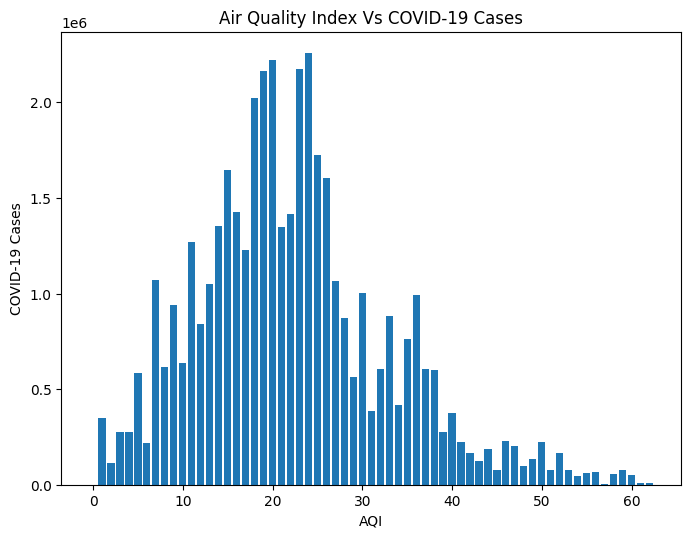

In [287]:
plt.figure(figsize=(8, 6), dpi=100);
y_pos = np.arange(len(data_by_aqi['AQI']))
plt.bar(y_pos, data_by_aqi['cases'])
plt.ylabel('COVID-19 Cases')
plt.xlabel('AQI')
plt.title('Air Quality Index Vs COVID-19 Cases')

What is interesting to note is that the maximum number of cases occur when AQI is between 10 and 30. We expected this data to be left skewed, as cases would be positively correlated with AQI. However, we do not see this trend here. 

# <b id="linear">4.1. Linear Regression and Hypothesis Test</b>
Now that we have our analysis done we can start doing linear regression and test our predictions. When doing a linear regression, we're taking data that is already there and predicting future data base on the patterns of the data we already have. We are going to take a linear regression of just our # of Cases vs Date data and compare it to another regression when taking account States using a f test. And we predict that if we can account many factors, we will be able to have more accurate predictions.

<strong>Linear Regression on cases by Years</strong><br>
We will start creating the linear regression model for COVID-19 Cases vs Date. We will be using the Linear Regression model library to create the model and to get our predicted values.

Refer to the documentation for more info http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Text(0.5, 1.0, 'COVID-19 Cases vs Day with Linear Regression')

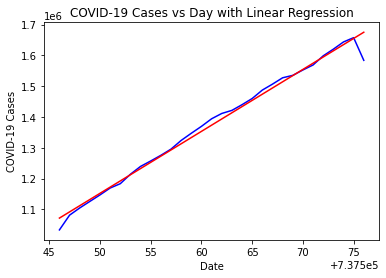

In [298]:
#Linear Regression
from sklearn import linear_model
import datetime as dt

cases_per_day['date'] = pd.to_datetime(cases_per_day['date'])
cases_per_day['date']=cases_per_day['date'].map(dt.datetime.toordinal)

reg = linear_model.LinearRegression()
X = [[x] for x in cases_per_day['date'].values]
Y = [[y] for y in cases_per_day['cases'].values]
regfit = reg.fit(X, Y)

#Get predcited Values
pred_cases = []
for x in cases_per_day['date'].values:
    pred_cases.append(regfit.predict(x.reshape(-1,1)))
                      
cases_per_day['pred_cases'] = pd.Series(pred_cases, index = cases_per_day.index)

#Plot the linear regression line with the data
plt.plot(cases_per_day['date'], cases_per_day['cases'], color='blue',)
plt.plot(cases_per_day['date'], cases_per_day['pred_cases'], color='red')
plt.xlabel("Date")
plt.ylabel("COVID-19 Cases")
plt.title("COVID-19 Cases vs Day with Linear Regression")

<strong>Fitting the Linear Regression Model</strong><br>
First we would need to create a new table that will group the data by Year and State so that we can get the number of cases associated with those columns. Next we would like to fit the data we had to the linear regression model. In order to do this we will be using the ols regression library to retrieve the linear regression formula. Documentation can be found at http://www.statsmodels.org/stable/index.html<br>

In this section, we would like to fit two different linear regressions. First is the regression with cases associate with day. Second is the regression with both day and state as factors. Here is the result for the first regression:

In [300]:
from statsmodels.formula.api import ols
#Fit the first regression

regression = ols(formula='cases ~ date', data=cases_per_day).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2360.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           2.46e-29
Time:                        12:22:47   Log-Likelihood:                -350.91
No. Observations:                  31   AIC:                             705.8
Df Residuals:                      29   BIC:                             708.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.484e+10   3.05e+08    -48.571      0.000   -1.55e+10   -1.42e+10
date        2.012e+04    414.109     48.576      0.000    1.93e+04     2.1e+04
==============================================================================
Omnibus:                       47.664   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.766
Skew:                          -3.199   Prob(JB):                     2.11e-50
Kurtosis:                      14.669   Cond. No.                     6.08e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second linear regression requires not only date but it also accounts for the states that these cases are in. Therefore, we predict that if we includes state as another factor, then this linear regression model will be more accurate. Here is the second one but we also need to sanitize our data a little bit by counting the number of cases by day and state:

In [305]:
# Create new table with copy of data
data_by_state_date = full_df.copy()
# Get year and state columns
data_by_state_date = data_by_state_date[['date','state','cases']]
data_by_state_date = data_by_state_date.groupby(['date','state'])['cases'].sum()
data_by_state_date = data_by_state_date.reset_index()

# Fit the Regression
regression2 = ols(formula='cases ~ date + state', data=data_by_state_date).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2339.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:29:01   Log-Likelihood:                -13500.
No. Observations:                1363   AIC:                         2.715e+04
Df Residuals:                    1288   BIC:                         2.754e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -6441.2280   1209.750     -5.324      0.000   -8814.524   -4067.931
date[T.Timestamp('2020-05-02 00:00:00')]   585.4380   1056.590      0.554      0.580   -1487.387    2658.264
date[T.Timestamp('2020-05-03 00:00:00')]  1105.2603   1056.590      1.046      0.296    -967.565    3178.086
date[T.Timestamp('2020-05-04 00:00:00')]  1577.5936   1056.590      1.493      0.136    -495.232    3650.419
date[T.Timestamp('2020-05-05 00:00:00')]  2046.8380   1056.590      1.937      0.053     -25.987    4119.664
date[T.Timestamp('2020-05-06 00:00:00')]  2543.4603   1056.590      2.407      0.016     470.635    4616.286
date[T.Timestamp('2020-05-07 00:00:00')]  3080.9842   1069.083      2.882      0.004     983.649    5178.319
date[T.Timestamp('2020-05-08 00:00:00')]  3696.7008   1063.021      3.478      0.001    1611.257    5782.144
date[T.Timestamp('2020-05-09 00:00:00')]  4275.6099   1063.021      4.022      0.000    2190.166    6361.053
date[T.Timestamp('2020-05-10 00:00:00')]  4674.9281   1063.021      4.398      0.000    2589.485    6760.372
date[T.Timestamp('2020-05-11 00:00:00')]  5093.3826   1063.021      4.791      0.000    3007.939    7178.826
date[T.Timestamp('2020-05-12 00:00:00')]  5550.6781   1063.021      5.222      0.000    3465.235    7636.122
date[T.Timestamp('2020-05-13 00:00:00')]  5977.3269   1056.590      5.657      0.000    3904.501    8050.152
date[T.Timestamp('2020-05-14 00:00:00')]  6495.3492   1056.590      6.147      0.000    4422.524    8568.175
date[T.Timestamp('2020-05-15 00:00:00')]  6993.2825   1056.590      6.619      0.000    4920.457    9066.108
date[T.Timestamp('2020-05-16 00:00:00')]  7539.5492   1056.590      7.136      0.000    5466.724    9612.375
date[T.Timestamp('2020-05-17 00:00:00')]  7923.4380   1056.590      7.499      0.000    5850.613    9996.264
date[T.Timestamp('2020-05-18 00:00:00')]  8407.8826   1063.021      7.909      0.000    6322.439    1.05e+04
date[T.Timestamp('2020-05-19 00:00:00')]  8905.4722   1069.390      8.328      0.000    6807.535     1.1e+04
date[T.Timestamp('2020-05-20 00:00:00')]  9350.8513   1069.414      8.744      0.000    7252.867    1.14e+04
date[T.Timestamp('2020-05-21 00:00:00')]  9907.5190   1063.021      9.320      0.000    7822.076     1.2e+04
date[T.Timestamp('2020-05-22 00:00:00')]  1.035e+04   1063.021      9.732      0.000    8259.780    1.24e+04
date[T.Timestamp('2020-05-23 00:00:00')]  1.081e+04   1063.021     10.173      0.000    8729.144    1.29e+04
date[T.Timestamp('2020-05-24 00:00:00')]  1.142e+04   1076.061     10.611      0.000    9307.368    1.35e+04
date[T.Timestamp('2020-05-25 00:00:00')]  1.184e+04   1076.061     10.999      0.000    9724.439    1.39e+04
date[T.Timestamp('2020-05-26 00

<strong>Hypothesis Testing</strong><br>
In order to verify our hypothesis, we would like to introduce f-test. The purpose of this test is to verify our linear regression models fit the data well. A quick tutorial about f-test can be found at https://explorable.com/f-test. Also, f-test can be carried out by a technique called ANOVA. The demostration below uses this technique. How to use and syntax for this technique can be found at: http://www.statsmodels.org/stable/anova.html.

In [307]:
import statsmodels.api as sm
# Run ANOVA
result = sm.stats.anova_lm(regression, typ=2)
result

,sum_sq,df,F,PR(>F)
date,1.003509e+12,1.0,2359.611282,2.461160e-29
Residual,1.233329e+10,29.0,NaN,NaN


In [308]:
# Run ANOVA
result2 = sm.stats.anova_lm(regression2, typ=2)
result2

,sum_sq,df,F,PR(>F)
date,2.448345e+10,30.0,32.872016,2.396264e-136
state,4.269082e+12,44.0,3908.019839,0.000000e+00
Residual,3.197724e+10,1288.0,NaN,NaN


Based on our f-test information of the two linear regression models, when you take a look at the PR(>F) column of the test data, the regression mdoel that takes both state and date as factors has a really small value for that column compared to the other linear regression model that just takes year as a factor. Therefore the model that takes both year and state as a factor will provide us with the most accurate predictions.

In [313]:
#Create new table with copy of data
data_by_state_date2 = full_df.copy()
#Get year and state columns
data_by_state_date2 = data_by_state_date2[['date','state','AQI','cases']]
data_by_state_date2 = data_by_state_date2.groupby(['date','AQI','state'])['cases'].sum()
data_by_state_date2 = data_by_state_date2.reset_index()

# Fit the Regression
regression3 = ols(formula='cases ~ date + state + AQI*state', data=data_by_state_date2).fit()
regression3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1492.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:34:43   Log-Likelihood:                -13458.
No. Observations:                1363   AIC:                         2.716e+04
Df Residuals:                    1243   BIC:                         2.778e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -1.006e+04   2402.658     -4.186      0.000   -1.48e+04   -5342.855
date[T.Timestamp('2020-05-02 00:00:00')]   610.8115   1056.217      0.578      0.563   -1461.354    2682.977
date[T.Timestamp('2020-05-03 00:00:00')]   997.3212   1067.569      0.934      0.350   -1097.115    3091.758
date[T.Timestamp('2020-05-04 00:00:00')]  1728.6478   1055.470      1.638      0.102    -342.052    3799.348
date[T.Timestamp('2020-05-05 00:00:00')]  2101.1269   1058.461      1.985      0.047      24.560    4177.693
date[T.Timestamp('2020-05-06 00:00:00')]  2795.2627   1059.722      2.638      0.008     716.222    4874.303
date[T.Timestamp('2020-05-07 00:00:00')]  3272.6359   1065.601      3.071      0.002    1182.060    5363.211
date[T.Timestamp('2020-05-08 00:00:00')]  3725.0953   1064.276      3.500      0.000    1637.120    5813.071
date[T.Timestamp('2020-05-09 00:00:00')]  4442.2606   1062.793      4.180      0.000    2357.195    6527.326
date[T.Timestamp('2020-05-10 00:00:00')]  4656.2556   1066.324      4.367      0.000    2564.262    6748.249
date[T.Timestamp('2020-05-11 00:00:00')]  5242.7619   1069.659      4.901      0.000    3144.225    7341.299
date[T.Timestamp('2020-05-12 00:00:00')]  5591.7685   1062.764      5.262      0.000    3506.759    7676.778
date[T.Timestamp('2020-05-13 00:00:00')]  6053.0404   1062.116      5.699      0.000    3969.303    8136.778
date[T.Timestamp('2020-05-14 00:00:00')]  6383.0330   1068.381      5.974      0.000    4287.003    8479.062
date[T.Timestamp('2020-05-15 00:00:00')]  6715.4570   1079.234      6.222      0.000    4598.136    8832.778
date[T.Timestamp('2020-05-16 00:00:00')]  7664.6197   1061.537      7.220      0.000    5582.018    9747.221
date[T.Timestamp('2020-05-17 00:00:00')]  8153.6233   1073.647      7.594      0.000    6047.262    1.03e+04
date[T.Timestamp('2020-05-18 00:00:00')]  8641.9552   1081.496      7.991      0.000    6520.197    1.08e+04
date[T.Timestamp('2020-05-19 00:00:00')]  9356.6635   1080.790      8.657      0.000    7236.289    1.15e+04
date[T.Timestamp('2020-05-20 00:00:00')]  9608.5252   1082.103      8.879      0.000    7485.575    1.17e+04
date[T.Timestamp('2020-05-21 00:00:00')]  1.009e+04   1071.329      9.419      0.000    7989.509    1.22e+04
date[T.Timestamp('2020-05-22 00:00:00')]  1.023e+04   1071.202      9.546      0.000    8124.302    1.23e+04
date[T.Timestamp('2020-05-23 00:00:00')]  1.089e+04   1065.258     10.226      0.000    8803.320     1.3e+04
date[T.Timestamp('2020-05-24 00:00:00')]  1.126e+04   1085.628     10.368      0.000    9125.511    1.34e+04
date[T.Timestamp('2020-05-25 00:00:00')]  1.181e+04   1085.424     10.880      0.000    9679.867    1.39e+04
date[T.Timestamp('2020-05-26 00

In [315]:
#Run ANOVA
result3 = sm.stats.anova_lm(regression3, typ=2)
result3

,sum_sq,df,F,PR(>F)
date,2.306793e+10,30.0,31.768377,3.640099e-131
state,4.263992e+12,44.0,4003.789916,0.000000e+00
AQI,6.736396e+07,1.0,2.783141,9.551304e-02
AQI:state,1.823936e+09,44.0,1.712633,2.834126e-03
Residual,3.008594e+10,1243.0,NaN,NaN


However, in our third regression shows us that AQI is not a significant predictor for the number of COVID-19 cases. This is due to the p-value for AQI being greater than .05, thus we cannot be 95% confident that AQI is a significant predictor for COVID-19 cases. 

# 4.2. <b id="ml">Machine Learning</b>
We will cluster states based off their air quality, latitude, longitude. This will allow us to see similar states and view how location and air quality impact COVID-19 cases. Our hypothesis is that the distribution of COVID-19 cases will be small within clusters. For this analysis, we will use the Kmeans package in sklearn.

Our first step is determining the optimal k value for clusters.

In [441]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [442]:
X = full_df[['AQI','Latitude','Longitude']]

In [443]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [444]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 16.267378679479947
2 : 13.016876044586283
3 : 10.421805824245308
4 : 9.266215138275909
5 : 8.432884008517826
6 : 7.881201027470854
7 : 7.371332337848087
8 : 7.019993972978247
9 : 6.887814490055538


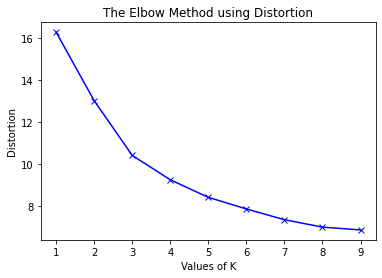

In [445]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [446]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 19607171.724236444
2 : 11848961.418640854
3 : 7489958.23126092
4 : 5995165.772748104
5 : 5013515.572422819
6 : 4381203.743344531
7 : 3899922.281674474
8 : 3568875.9399212957
9 : 3237766.2293465747


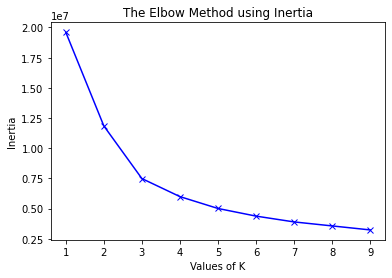

In [447]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

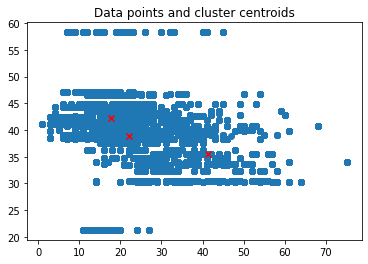

In [449]:
from sklearn.preprocessing import MinMaxScaler
X1 = X.to_numpy()

kmeans = KMeans(n_clusters=3).fit(X1)
# X['cluster'] = pred_y
plt.scatter(X1[:, 0], X1[:, 1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()


In order to determine the validity of our kmeans model, we will need to calculate a silhouette score. <br>
The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point o is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters. <br>
With scikit-learn, you can calculate the silhouette coefficients for all the data points very easily:

In [450]:
# cluster_df = pd.merge(full_df, X, how='left', on=['AQI','Latitude','Longitude'])
# cluster_df
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.3810637752736411


Our silhoutte score tells us that there may be some overlapping clusters, as it is somewhat close to 0. However, we will normalize our data to account for different units of each feature.

In [451]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X1)

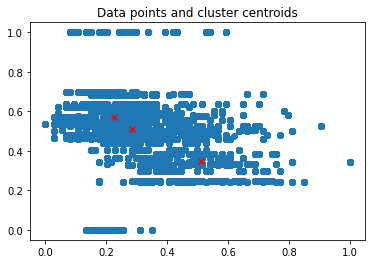

In [452]:
kmeans_scale = KMeans(n_clusters=3).fit(X_scaled)
# X['cluster'] = pred_y
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
    
plt.scatter(kmeans_scale.cluster_centers_[:, 0], kmeans_scale.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [453]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_scaled, kmeans_scale.labels_))

0.3610309496514004


Standardizing the data actually made the silhoutte score worse, so we will use our original kmeans model to view distribution of COVID-19 cases

In [457]:
y_hat = kmeans.predict(X1)

In [458]:
X[‘cluster’] = y_hat.copy()
X

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AQI,Latitude,Longitude,cluster
0,30,33.543,-112.0710,2
1,30,33.543,-112.0710,2
2,30,33.543,-112.0710,2
3,30,33.543,-112.0710,2
4,30,33.543,-112.0710,2
...,...,...,...,...
116784,11,58.300,-134.4167,2
116785,11,58.300,-134.4167,2
116786,11,58.300,-134.4167,2
116787,11,58.300,-134.4167,2


In [459]:
cluster_df = pd.merge(full_df, X, how='left', on=['AQI','Latitude','Longitude'])
cluster_df.head()

,state,date,cases,HourObserved,LocalTimeZone,ReportingArea,Latitude,Longitude,ParameterName,AQI,Category,cluster
0,AZ,2020-05-01,4156,0,MST,Phoenix,33.543,-112.071,PM2.5,30,"{'Number': 1, 'Name': 'Good'}",2
1,AZ,2020-05-01,4156,0,MST,Phoenix,33.543,-112.071,PM2.5,30,"{'Number': 1, 'Name': 'Good'}",2
2,AZ,2020-05-01,4156,0,MST,Phoenix,33.543,-112.071,PM2.5,30,"{'Number': 1, 'Name': 'Good'}",2
3,AZ,2020-05-01,4156,0,MST,Phoenix,33.543,-112.071,PM2.5,30,"{'Number': 1, 'Name': 'Good'}",2
4,AZ,2020-05-01,4156,0,MST,Phoenix,33.543,-112.071,PM2.5,30,"{'Number': 1, 'Name': 'Good'}",2


In [463]:
new_df = cluster_df.groupby(['date','cluster'])['cases'].sum()
new_df = new_df.reset_index()
new_df

,date,cluster,cases
0,2020-05-01,0,19174924
1,2020-05-01,1,55103634
2,2020-05-01,2,16231130
3,2020-05-02,0,25470464
4,2020-05-02,1,52350844
...,...,...,...
88,2020-05-30,1,155687087
89,2020-05-30,2,23701117
90,2020-05-31,0,34769454
91,2020-05-31,1,123737649


In [467]:
cluster_0 = new_df[new_df['cluster']==0]
cluster_1 = new_df[new_df['cluster']==1]
cluster_2 = new_df[new_df['cluster']==2]

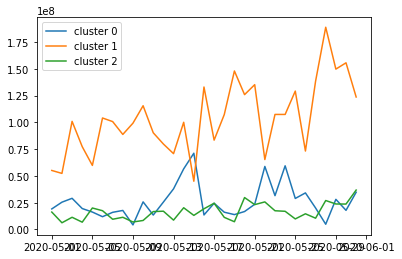

In [468]:
fig, ax = plt.subplots()
ax.plot(cluster_0['date'], cluster_0['cases'], label="cluster 0")
ax.plot(cluster_1['date'], cluster_1['cases'], label="cluster 1")
ax.plot(cluster_2['date'], cluster_2['cases'], label="cluster 2")
ax.legend()

plt.show()

We can see that cluster 1 contains those states with a high number of cases, whereas cluster 0 and cluster 2 are lower. Cluster 0 contains peaks, where it overlaps with cluster 1. This methodology has proves consistent with our hypothesis in that similar states (based off location & air pollution) will have a similar (low distribution of) number of COVID-19 cases.

# 5. <b id="insight_policy">Insight and Policy Decisions</b>

<ul>
    <li>As time passed in May, the number of COVID-19 cases increased.</li>
    <li>States had varying number of COVID-19 cases, which makes sense because each state manages quarantine differently.</li>
    <li>Since AQI was determined to not be a safe predictor for COVID-19, conclusions about the relationship between air pollution and COVID-19 cases can not be made.</li>
    <li>In the future, we could find more comprehensive data, analyze AQI more in depth per state, and take into account other state factors such as quarantine implementation.</li>
    <li>Analyzing AQI could allow better decisions to be made about reducing emissions in the US.</li>
</ul>
